In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline 

In [2]:
df = pd.read_csv('FuelConsumption.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [5]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [6]:
cdf.shape

(1067, 6)

### Exploratory Data Analysis

In [7]:
cdf.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_CITY    0
FUELCONSUMPTION_HWY     0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

In [8]:
cdf.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


In [9]:
cdf.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


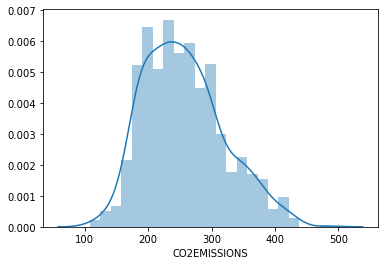

In [10]:
sns.distplot(cdf['CO2EMISSIONS'])

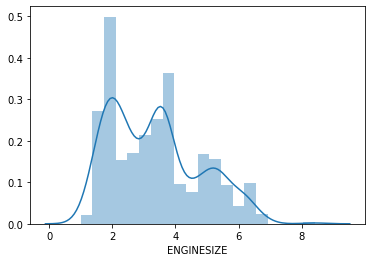

In [11]:
sns.distplot(cdf['ENGINESIZE'], bins=20)

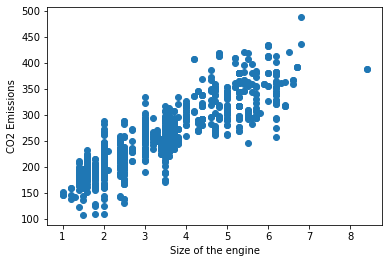

In [12]:
plt.scatter(x=cdf['ENGINESIZE'], y=cdf['CO2EMISSIONS'])
plt.xlabel('Size of the engine')
plt.ylabel('CO2 Emissions')
plt.show()

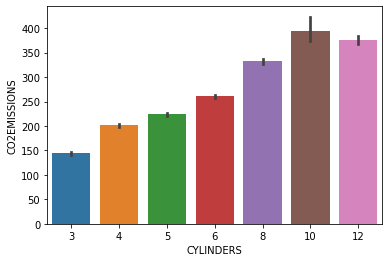

In [13]:
sns.barplot(x=cdf['CYLINDERS'], y=cdf['CO2EMISSIONS'])

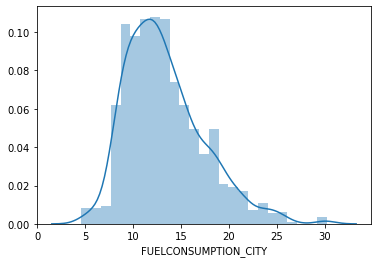

In [14]:
sns.distplot(cdf['FUELCONSUMPTION_CITY'])

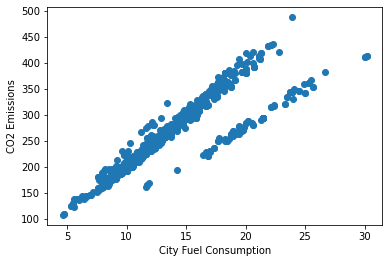

In [15]:
plt.scatter(x=cdf['FUELCONSUMPTION_CITY'], y=cdf['CO2EMISSIONS'])
plt.xlabel('City Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()

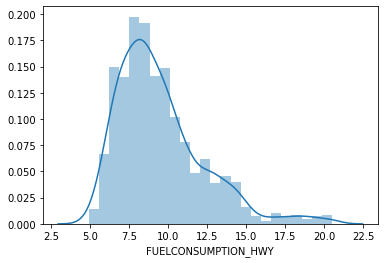

In [16]:
sns.distplot(cdf['FUELCONSUMPTION_HWY'])

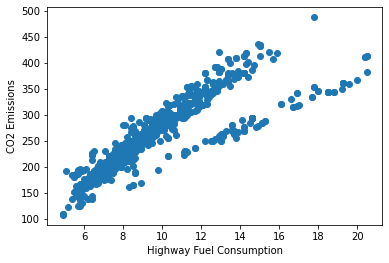

In [17]:
plt.scatter(x=cdf['FUELCONSUMPTION_HWY'], y=cdf['CO2EMISSIONS'])
plt.xlabel('Highway Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()

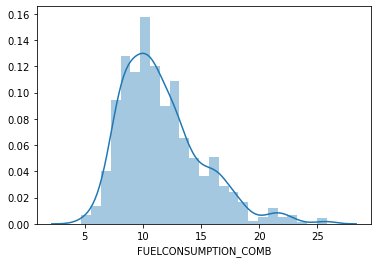

In [18]:
sns.distplot(cdf['FUELCONSUMPTION_COMB'])

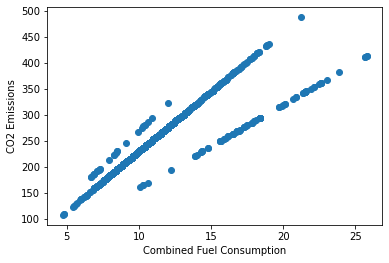

In [19]:
plt.scatter(x=cdf['FUELCONSUMPTION_COMB'], y=cdf['CO2EMISSIONS'])
plt.xlabel('Combined Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()

### Preprocessing

In [20]:
cylinders = pd.get_dummies(cdf['CYLINDERS'], prefix = 'cyl')
cylinders

,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8,cyl_10,cyl_12
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
1062,0,0,0,1,0,0,0
1063,0,0,0,1,0,0,0
1064,0,0,0,1,0,0,0
1065,0,0,0,1,0,0,0


In [21]:
cdf = pd.concat([cdf, cylinders], axis = 1)
cdf.drop("CYLINDERS", axis = 1, inplace = True)
cdf.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8,cyl_10,cyl_12
0,2.0,9.9,6.7,8.5,196,0,1,0,0,0,0,0
1,2.4,11.2,7.7,9.6,221,0,1,0,0,0,0,0
2,1.5,6.0,5.8,5.9,136,0,1,0,0,0,0,0
3,3.5,12.7,9.1,11.1,255,0,0,0,1,0,0,0
4,3.5,12.1,8.7,10.6,244,0,0,0,1,0,0,0


##### Normalization

In [22]:
cdf['ENGINESIZE'] = cdf['ENGINESIZE'] / cdf['ENGINESIZE'].max()
#cdf['FUELCONSUMPTION_CITY'] = cdf['FUELCONSUMPTION_CITY'] / cdf['FUELCONSUMPTION_CITY'].max()
#cdf['FUELCONSUMPTION_HWY'] = cdf['FUELCONSUMPTION_HWY'] / cdf['FUELCONSUMPTION_HWY'].max()
cdf['FUELCONSUMPTION_COMB'] = cdf['FUELCONSUMPTION_COMB'] / cdf['FUELCONSUMPTION_COMB'].max()
#cdf.head()

### Multiple Linear Regression Model

In [23]:
x1 = cdf.copy()
x1.drop("CO2EMISSIONS", axis = 1, inplace = True)
x1.drop("FUELCONSUMPTION_HWY", axis = 1, inplace = True)
x1.drop("FUELCONSUMPTION_CITY", axis = 1, inplace = True)

In [24]:
y = cdf['CO2EMISSIONS']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=0)

In [26]:
reg = LinearRegression()

In [27]:
reg.fit(x_train,y_train)
y_hat_train = reg.predict(x_train)

In [28]:
score_train = r2_score(y_train, y_hat_train)

In [29]:
score_train

0.8655709537410228

In [30]:
MSE_train = mean_squared_error(y_train, y_hat_train)
MSE_train

531.0771421038576

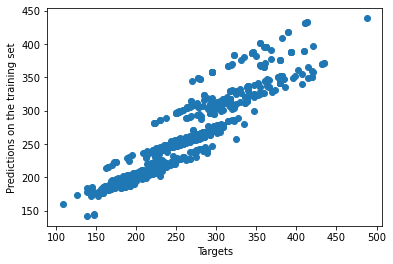

In [31]:
plt.scatter(y_train, y_hat_train)
plt.xlabel('Targets')
plt.ylabel('Predictions on the training set')
plt.show()

Text(0.5, 1.0, 'Training Set Residuals PDF')

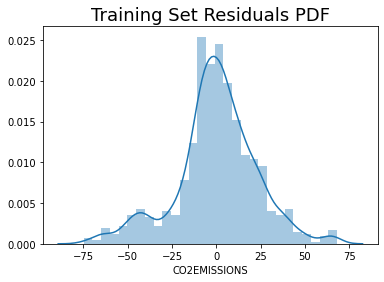

In [32]:
sns.distplot(y_train - y_hat_train)
plt.title("Training Set Residuals PDF", size=18)

In [33]:
y_hat_test = reg.predict(x_test)
score_test = r2_score(y_test, y_hat_test)
MSE_test = mean_squared_error(y_test, y_hat_test)
print(score_test)
print(MSE_test)

0.8616421508680026
584.0756510276269


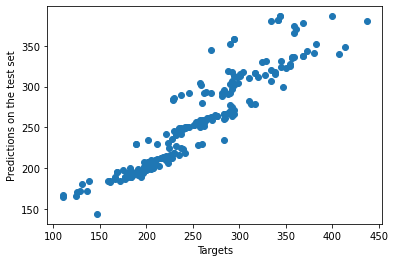

In [34]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets')
plt.ylabel('Predictions on the test set')
plt.show()

Text(0.5, 1.0, 'Test Set Residuals PDF')

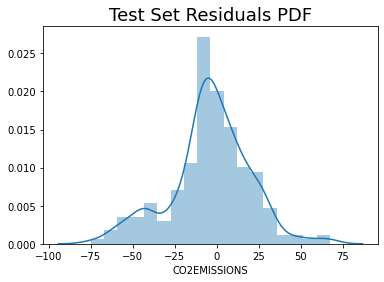

In [35]:
sns.distplot(y_test - y_hat_test)
plt.title("Test Set Residuals PDF", size=18)